In [30]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join("..", "src"))
if module_path not in sys.path:
    sys.path.append(module_path)
from train_model import train_all_models, compare_models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from train_model import (
    load_clean_dataset,
    split_xy,
    train_random_forest,
    train_knn,
    train_svm,
    evaluate_model,
    show_confusion_matrix,
    save_model,
    train_all_models,
    compare_models
)




In [31]:
dataset_path = os.path.join(module_path, "..", "Data", "processed", "dataset_clean.csv")
df = pd.read_csv(dataset_path)

print("Dataset cargado correctamente.\n")
display(df.head())

Dataset cargado correctamente.



,Temperature,Humidity,pH,Rainfall,Label,Category
0,20.879744,82.002744,6.502985,202.935536,Rice,Cereal
1,21.770462,80.319644,7.038096,226.655537,Rice,Cereal
2,23.004459,82.320763,7.840207,263.964248,Rice,Cereal
3,26.491096,80.158363,6.980401,242.864034,Rice,Cereal
4,20.130175,81.604873,7.628473,262.717340,Rice,Cereal


Separamos X y Y

In [32]:
X, y = split_xy(df) 


Category
Vegetable          2100
Fruit              1300
Commercial Crop    1100
Legume              900
Other               600
Cereal              400
Medicinal           200
Flower              200
Spice               200
Name: count, dtype: int64


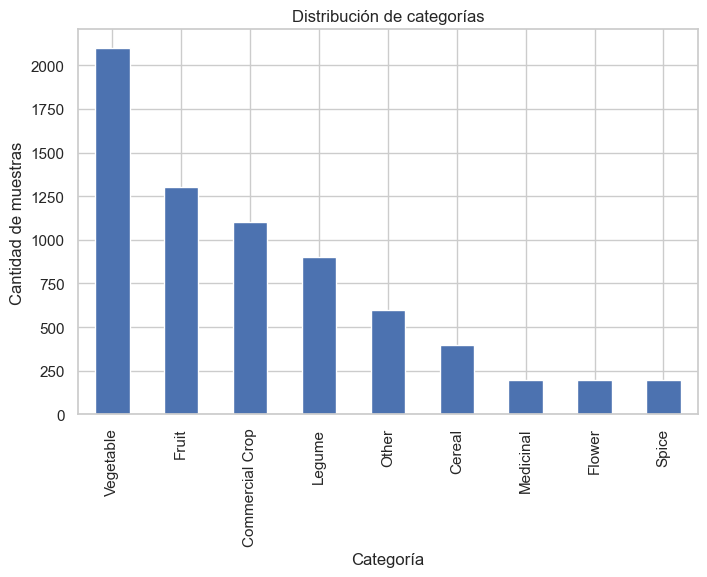

In [33]:
# Revisar balanceo de categorías
print(df["Category"].value_counts())

df["Category"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribución de categorías")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de muestras")
plt.show()

Escalamiento y division

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [36]:
print("Tamaños de los conjuntos:")
print("Train:", X_train.shape)
print("Test :", X_test.shape)


Tamaños de los conjuntos:
Train: (5600, 4)
Test : (1400, 4)


In [37]:
labels = sorted(df["Category"].unique())
labels 

['Cereal',
 'Commercial Crop',
 'Flower',
 'Fruit',
 'Legume',
 'Medicinal',
 'Other',
 'Spice',
 'Vegetable']

ENTRENAMIENTO INDIVIDUAL DE MODELOS

Random Forest

In [38]:
rf = train_random_forest(X_train, y_train)
rf_eval = evaluate_model(rf, X_train, X_test, y_train, y_test)

In [39]:
print("\n================ RANDOM FOREST ================")
print(f"Train Accuracy RF: {rf_eval['train_acc']:.4f}")
print(f"Test  Accuracy RF: {rf_eval['test_acc']:.4f}")

print("\n--- Reporte RF ---")
print(rf_eval["report"])



================ RANDOM FOREST ================
Train Accuracy RF: 1.0000
Test  Accuracy RF: 0.9771

--- Reporte RF ---
                 precision    recall  f1-score   support

         Cereal       0.96      0.96      0.96        80
Commercial Crop       0.98      0.97      0.98       220
         Flower       0.94      0.82      0.88        40
          Fruit       0.97      1.00      0.98       260
         Legume       0.99      0.98      0.99       180
      Medicinal       1.00      1.00      1.00        40
          Other       0.96      0.94      0.95       120
          Spice       1.00      0.97      0.99        40
      Vegetable       0.98      0.99      0.98       420

       accuracy                           0.98      1400
      macro avg       0.98      0.96      0.97      1400
   weighted avg       0.98      0.98      0.98      1400




--- Matriz Normalizada RF ---


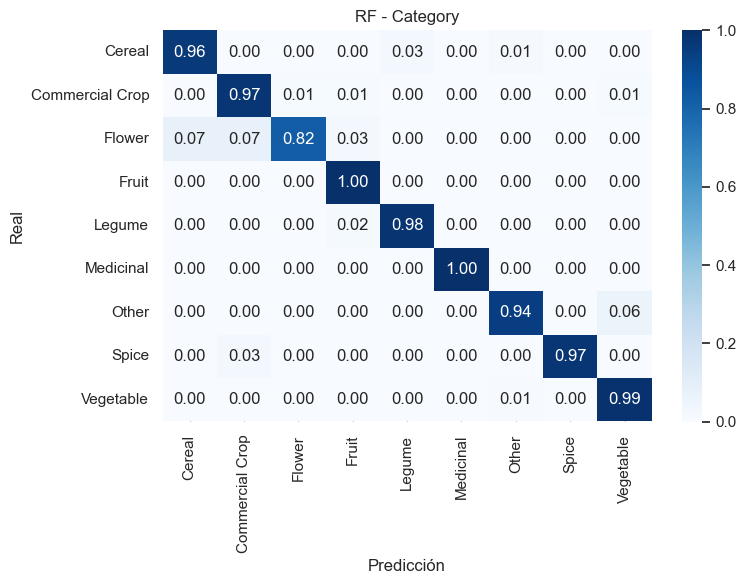

In [40]:
print("\n--- Matriz Normalizada RF ---")
show_confusion_matrix(rf_eval["cm"], "RF - Category", labels)

El modelo Random Forest mostró un rendimiento altamente satisfactorio, alcanzando una precisión global del 97.7% en el conjunto de prueba, lo cual indica que es capaz de clasificar correctamente la mayoría de los cultivos según su categoría.

In [41]:
save_model(rf, "../Models/category_RF_model.joblib")
 

KNN

In [42]:
knn = train_knn(X_train, y_train)
knn_eval = evaluate_model(knn, X_train, X_test, y_train, y_test)

In [43]:
print("\n==================== KNN ====================")
print(f"Train Accuracy KNN: {knn_eval['train_acc']:.4f}")
print(f"Test  Accuracy KNN: {knn_eval['test_acc']:.4f}")

print("\n--- Reporte KNN ---")
print(knn_eval["report"])


==================== KNN ====================
Train Accuracy KNN: 0.9359
Test  Accuracy KNN: 0.8929

--- Reporte KNN ---
                 precision    recall  f1-score   support

         Cereal       0.80      0.82      0.81        80
Commercial Crop       0.88      0.90      0.89       220
         Flower       0.71      0.72      0.72        40
          Fruit       0.88      0.91      0.89       260
         Legume       0.94      0.82      0.88       180
      Medicinal       0.97      0.95      0.96        40
          Other       0.88      0.78      0.82       120
          Spice       0.97      0.82      0.89        40
      Vegetable       0.92      0.97      0.95       420

       accuracy                           0.89      1400
      macro avg       0.88      0.86      0.87      1400
   weighted avg       0.89      0.89      0.89      1400




--- Matriz Normalizada KNN ---


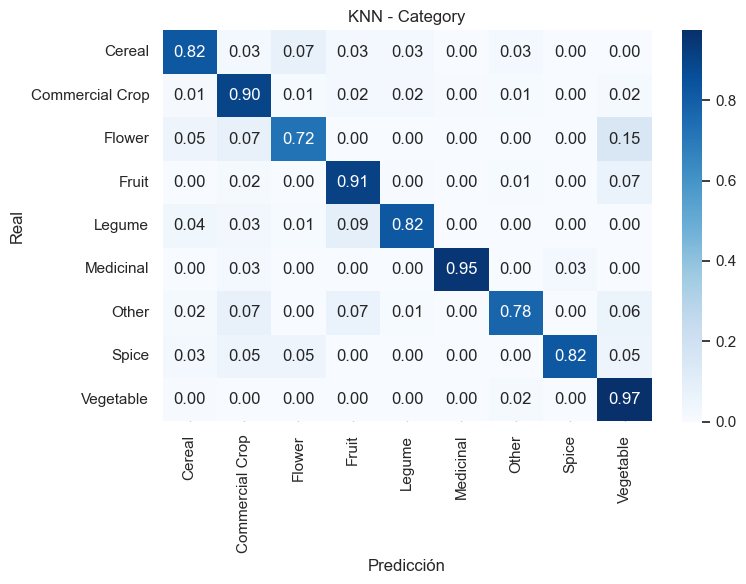

In [44]:
print("\n--- Matriz Normalizada KNN ---")
show_confusion_matrix(knn_eval["cm"], "KNN - Category", labels)

El modelo KNN obtuvo un desempeño moderadamente bueno, con una precisión del 89% en el conjunto de prueba, pero claramente inferior al rendimiento alcanzado por Random Forest. Esto indica que, aunque KNN es capaz de clasificar correctamente la mayoría de las muestras, presenta más errores y mayor variabilidad entre categorías.

In [45]:
save_model(knn, "../Models/category_KNN_model.joblib")
 

SVM

In [46]:
svm = train_svm(X_train, y_train)
svm_eval = evaluate_model(svm, X_train, X_test, y_train, y_test)

In [47]:
print("\n===================== SVM =====================")
print(f"Train Accuracy SVM: {svm_eval['train_acc']:.4f}")
print(f"Test  Accuracy SVM: {svm_eval['test_acc']:.4f}")

print("\n--- Reporte SVM ---")
print(svm_eval["report"])


===================== SVM =====================
Train Accuracy SVM: 0.7955
Test  Accuracy SVM: 0.7957

--- Reporte SVM ---
                 precision    recall  f1-score   support

         Cereal       0.62      0.62      0.62        80
Commercial Crop       0.80      0.75      0.78       220
         Flower       0.87      0.33      0.47        40
          Fruit       0.75      0.82      0.78       260
         Legume       0.83      0.79      0.81       180
      Medicinal       0.97      0.90      0.94        40
          Other       0.84      0.55      0.66       120
          Spice       0.96      0.60      0.74        40
      Vegetable       0.81      0.96      0.88       420

       accuracy                           0.80      1400
      macro avg       0.83      0.70      0.74      1400
   weighted avg       0.80      0.80      0.79      1400




--- Matriz Normalizada SVM ---


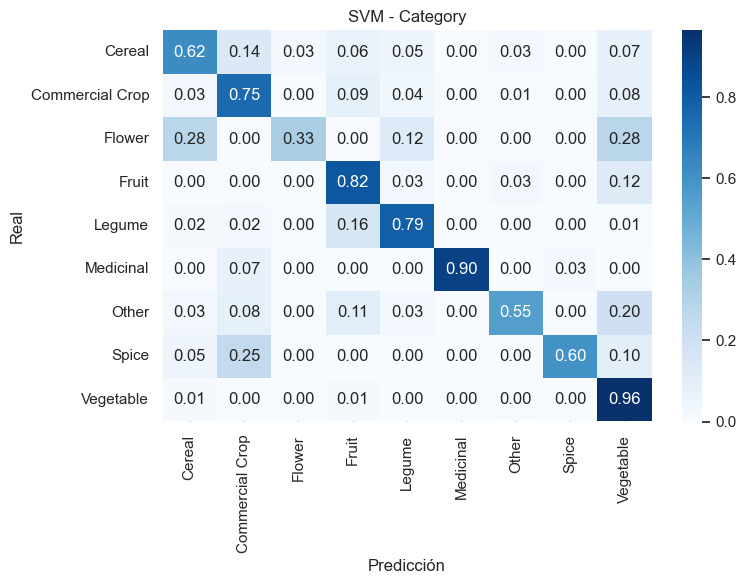

In [48]:
print("\n--- Matriz Normalizada SVM ---")
show_confusion_matrix(svm_eval["cm"], "SVM - Category", labels)

El modelo SVM muestra un rendimiento moderado, alcanzando un accuracy cercano al 80% tanto en entrenamiento como en prueba. Este equilibrio indica que el modelo no está sobreajustado, pero también evidencia que su capacidad de separación entre categorías es más limitada respecto a otros modelos evaluados.

In [49]:
save_model(svm, "../Models/category_SVM_model.joblib")
 

Analisis y comparacion de los modelos

COMPARACION FINAL DE MODELOS
          Modelo  Accuracy Entrenamiento  Accuracy Prueba
0  Random Forest                  1.0000           0.9771
1            KNN                  0.9359           0.8929
2            SVM                  0.7955           0.7957

MEJOR MODELO:
Modelo: Random Forest
Accuracy de prueba: 0.9771


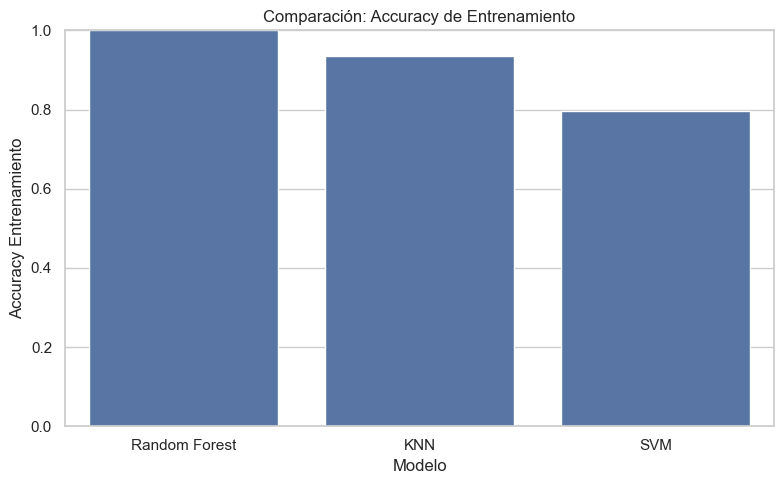

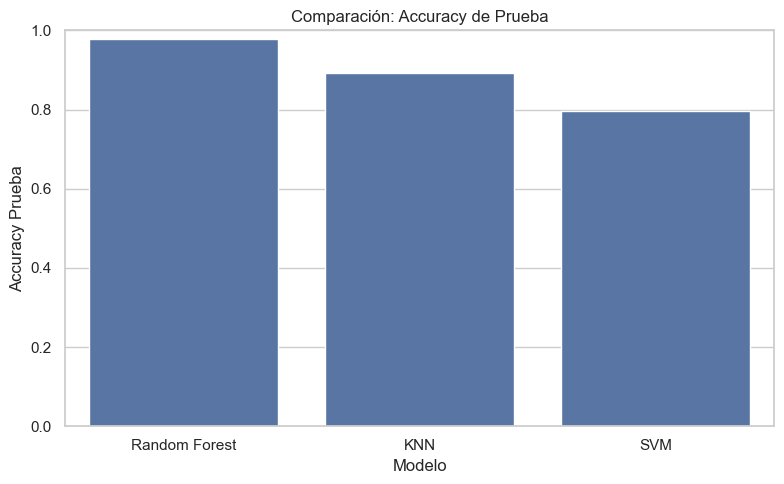

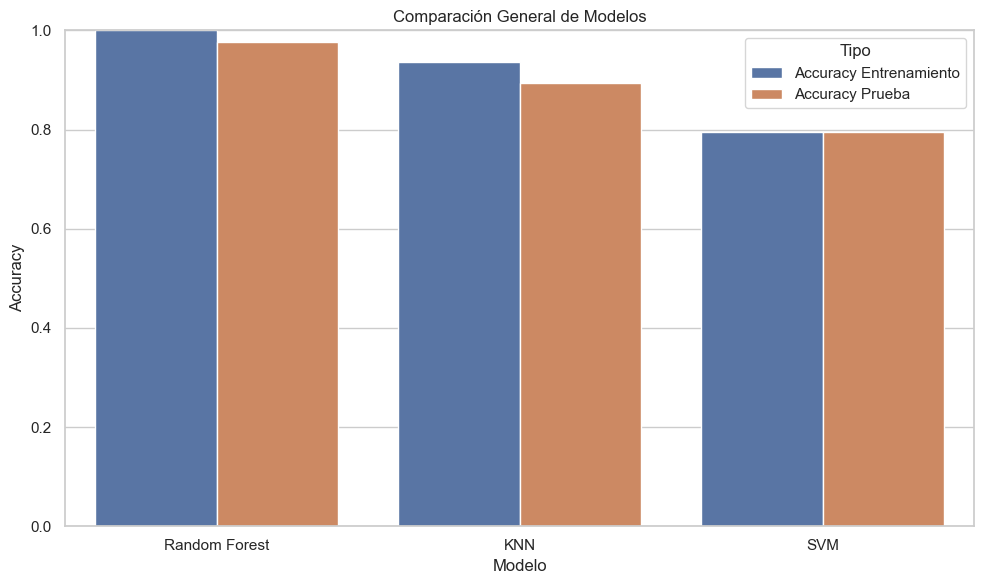

,Modelo,Accuracy Entrenamiento,Accuracy Prueba
0,Random Forest,1.0000,0.9771
1,KNN,0.9359,0.8929
2,SVM,0.7955,0.7957


In [50]:
 # Comparar modelos y escoger el mejor
results = {
	'Random Forest': rf_eval,
	'KNN': knn_eval,
	'SVM': svm_eval
}

comp_df, best_model = compare_models(results)

comp_df


Como equipo, después de realizar el entrenamiento y evaluación de los tres modelos Random Forest (RF), KNN y SVM determinamos que Random Forest es el modelo con mejor desempeño, alcanzando la mayor precisión en las pruebas y mostrando mayor estabilidad entre los valores de entrenamiento y prueba. Aunque KNN y SVM también mostraron buenos resultados, su desempeño fue inferior, por lo que concluimos que Random Forest es la opción más adecuada y confiable para realizar la clasificación en nuestro proyecto.